In [1]:
import pandas as pd
data = pd.read_csv('/home/quoc/works/ML/data/train.csv')
data.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

# Check Normal Distribution

In [2]:
# Hàm check pp chuan
from scipy.stats import shapiro 
chuan = 0
khong_chuan = 0
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    stat, p_value = shapiro(data[column].dropna())  # Loại bỏ NaN
    print(f"Shapiro-Wilk Test for {column}: p-value = {p_value}")
    if p_value > 0.05:
        print(f"  => {column} có thể phân phối chuẩn")
        chuan += 1
    else:
        print(f"  => {column} không phân phối chuẩn")
        khong_chuan += 1
    print('--->')

print( 'Chuan ratio :',chuan/(chuan+khong_chuan)*100)
print('Khong chuan ratio :' ,khong_chuan/(chuan+khong_chuan)*100)

Shapiro-Wilk Test for Basic_Demos-Age: p-value = 2.3822159989299538e-36
  => Basic_Demos-Age không phân phối chuẩn
--->
Shapiro-Wilk Test for Basic_Demos-Sex: p-value = 0.0
  => Basic_Demos-Sex không phân phối chuẩn
--->
Shapiro-Wilk Test for CGAS-CGAS_Score: p-value = 0.0
  => CGAS-CGAS_Score không phân phối chuẩn
--->
Shapiro-Wilk Test for Physical-BMI: p-value = 2.802596928649634e-45
  => Physical-BMI không phân phối chuẩn
--->
Shapiro-Wilk Test for Physical-Height: p-value = 4.387932070712975e-19
  => Physical-Height không phân phối chuẩn
--->
Shapiro-Wilk Test for Physical-Weight: p-value = 2.027204117958297e-38
  => Physical-Weight không phân phối chuẩn
--->
Shapiro-Wilk Test for Physical-Waist_Circumference: p-value = 8.927465658094186e-23
  => Physical-Waist_Circumference không phân phối chuẩn
--->
Shapiro-Wilk Test for Physical-Diastolic_BP: p-value = 8.363307967497375e-36
  => Physical-Diastolic_BP không phân phối chuẩn
--->
Shapiro-Wilk Test for Physical-HeartRate: p-value =

Missing ratio label: 30.909090909090907


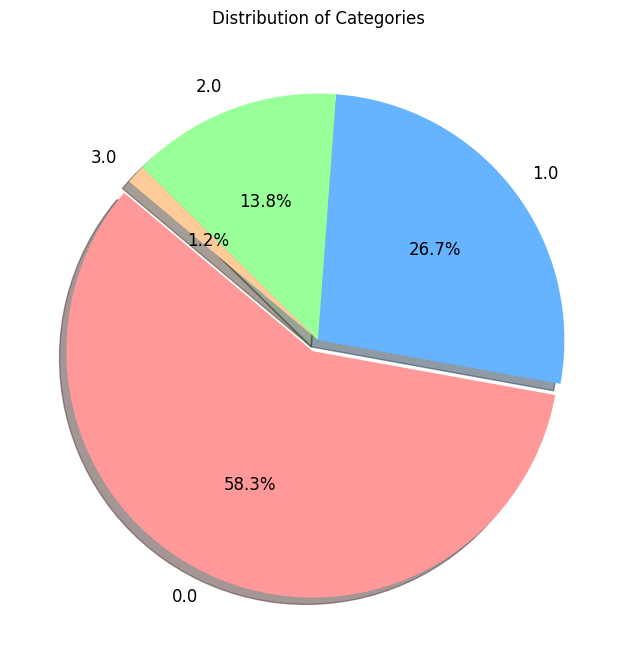

Number Original Features : 80
Number Category Features : 11
Number Numeric Features : 69


In [10]:
# Check ratio missing label
data_miss= data[data['sii'].isnull()]
print('Missing ratio label:',data_miss.shape[0]/data.shape[0]*100)
# Distribution of label
data_not_miss = data[data['sii'].notnull()]
data_y = data_not_miss['sii']
import matplotlib.pyplot as plt
category_counts = data_y.value_counts()
labels = category_counts.index
sizes = category_counts.values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  
explode = [0.05 if i == max(sizes) else 0 for i in sizes]  

plt.figure(figsize=(10, 8))  
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  
    startangle=140,  
    colors=colors,
    explode=explode,  
    shadow=True, 
    textprops={'fontsize': 12}  
)

plt.title("Distribution of Categories")
plt.ylabel('')  
plt.show()

original_csv_features = data.columns.tolist()
original_csv_features.remove('sii')
original_csv_features.remove('id')
print('Number Original Features :',len(original_csv_features))
# Filter Category data

is_cat = data.dtypes == 'object'
cat_cols = data.columns[is_cat]

cat_df = data[cat_cols].drop(columns=['id'])

# cat_csv_features: các features có kiểu category
cat_csv_features = cat_df.columns.tolist()
print('Number Category Features :' ,len(cat_csv_features))

# Filter Num data
num_csv_feeatures = [feature for feature in original_csv_features if feature not in cat_csv_features]

# Lọc dataframe chỉ chứa các numeric features
num_df = data[num_csv_feeatures]
print('Number Numeric Features :',len(num_csv_feeatures))


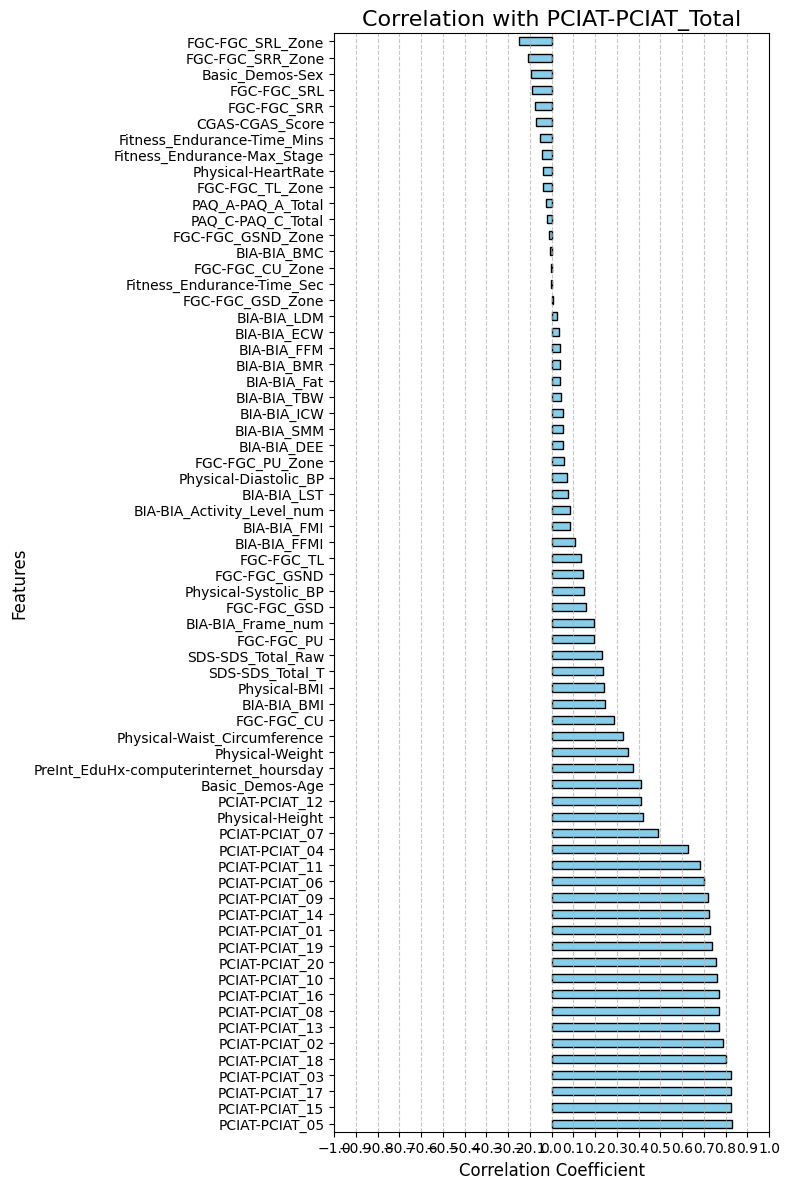

In [12]:
import numpy as np
# Độ tương quan giưa các cột với PCIAT-PCIAT_Total
correlations = num_df.corr()['PCIAT-PCIAT_Total'].drop('PCIAT-PCIAT_Total')

# Sắp xếp độ tương quan
sorted_correlations = correlations.sort_values(ascending=False)

# Plot biểu đồ dạng dọc
plt.figure(figsize=(8, 12))
sorted_correlations.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Correlation with PCIAT-PCIAT_Total', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Điều chỉnh trục y với bước nhảy 0.1
plt.xticks(np.arange(-1.0, 1.1, 0.1))
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

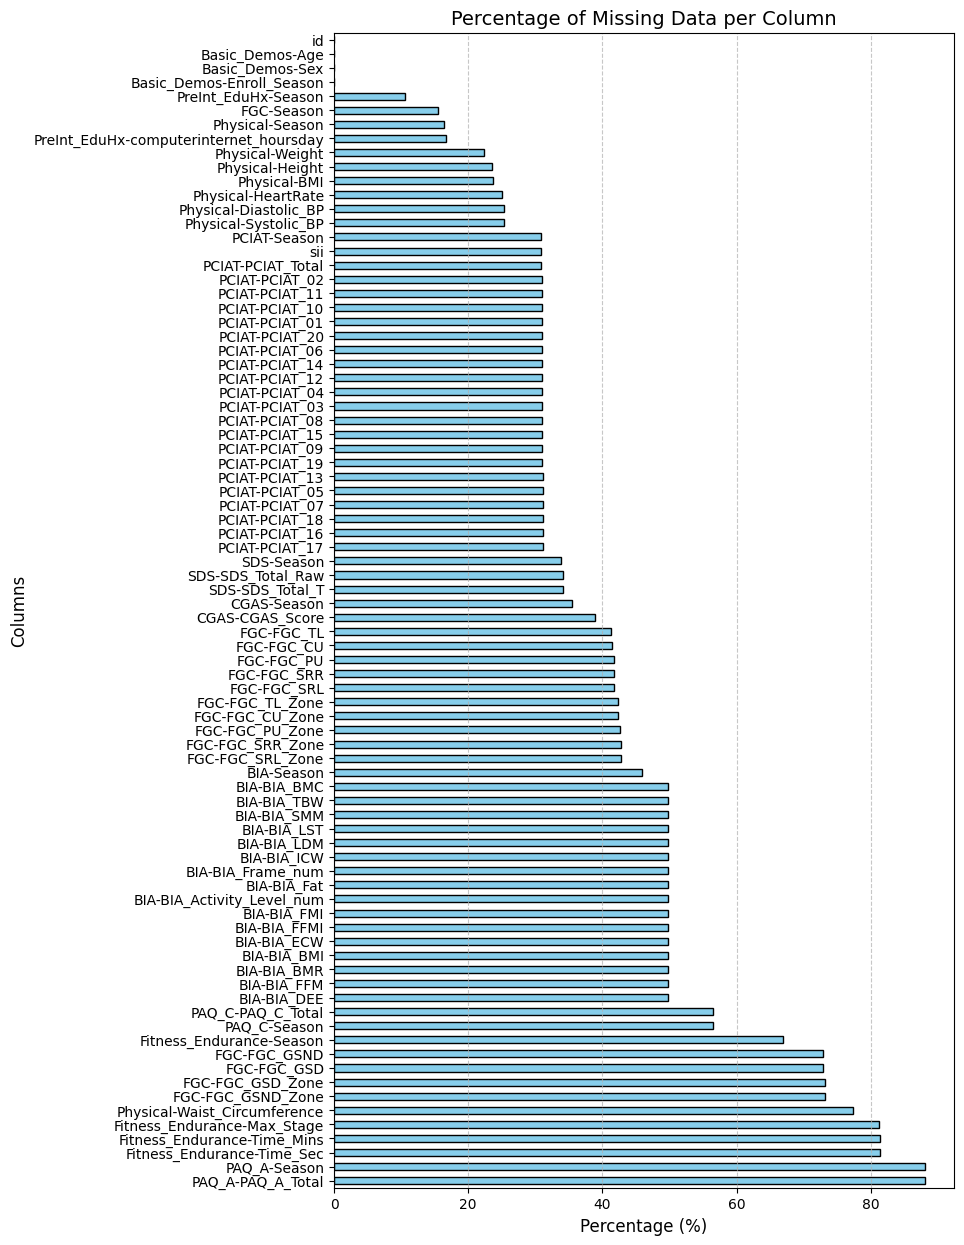

In [13]:

missing_ratio = data.isnull().mean() * 100

# Trực quan hóa tỷ lệ thiếu dữ liệu
plt.figure(figsize=(8, 15))
missing_ratio.sort_values(ascending=False).plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Percentage of Missing Data per Column", fontsize=14)
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Columns", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
